# Slumpförsök med studentdata


I den här notebook kommer vi att utforska begreppet **slumpförsök** med hjälp av ett dataset 
som innehåller information om studenter. Ett slumpförsök är ett experiment där utfallet 
inte är känt i förväg.

Vi kommer att utföra ett slumpmässigt urval av studenter från datasetet och diskutera 
sannolikheten för vissa utfall baserat på vårt urval.


## Ladda och förhandsvisa data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
figsize = 10

data_path = '../data/student-alcohol-consumption/student-mat.csv'
# https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

# Load the student data
student_data = pd.read_csv(data_path)
student_data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Lista över kolumner (kaggle)
##### Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. **school**: Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex**: Student's sex (binary: 'F' - female or 'M' - male)
3. **age**: Student's age (numeric: from 15 to 22)
4. **address**: Student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize**: Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus**: Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu**: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu**: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob**: Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob**: Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason**: Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian**: Student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime**: Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime**: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures**: Number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup**: Extra educational support (binary: yes or no)
17. **famsup**: Family educational support (binary: yes or no)
18. **paid**: Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities**: Extra-curricular activities (binary: yes or no)
20. **nursery**: Attended nursery school (binary: yes or no)
21. **higher**: Wants to take higher education (binary: yes or no)
22. **internet**: Internet access at home (binary: yes or no)
23. **romantic**: With a romantic relationship (binary: yes or no)
24. **famrel**: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime**: Free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout**: Going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc**: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc**: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health**: Current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences**: Number of school absences (numeric: from 0 to 93)




Grades:

1. **G1** - first period grade (numeric: from 0 to 20)
2. **G2** - second period grade (numeric: from 0 to 20)
3. **G3** - final grade (numeric: from 0 to 20, output target)

## Slumpmässigt urval av en student

In [2]:

# Randomly select one student from the dataset
random_student = student_data.sample(10)
random_student


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
156,GP,M,17,R,LE3,T,1,2,other,other,...,2,2,2,3,3,5,8,16,12,13
79,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,4,3,1,2,3,12,5,5,5
119,GP,M,15,U,GT3,T,3,4,other,other,...,3,4,3,1,2,4,6,14,13,13
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,8,11,11,10
332,GP,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,4,0,7,0,0
325,GP,M,18,U,GT3,T,4,4,other,other,...,4,3,3,2,2,3,3,9,12,11
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
365,MS,M,18,R,GT3,T,1,3,at_home,other,...,3,3,4,2,4,3,4,10,10,10
176,GP,F,16,U,GT3,T,2,2,services,other,...,3,4,4,1,4,5,2,13,13,11
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,9,8


Om vi är intresserade av att sampla förhållandet mellan studenternas betyg i början och slutet av kurser kan vi visaullisera dessa med t.ex. en scatter plot

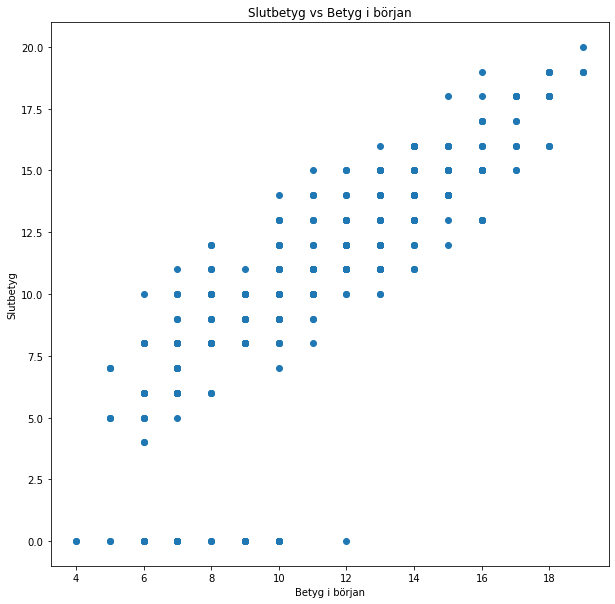

In [3]:
nbr_students = 500
replace = True

random_sample = student_data.sample(nbr_students, replace=replace)
random_sample
import matplotlib.pyplot as plt

# Plot a scatter plot of G1 vs G2 for the random sample
plt.figure(figsize=(figsize,figsize))
plt.scatter(random_sample['G1'], random_sample['G3'])
plt.xlabel('Betyg i början')
plt.ylabel('Slutbetyg')
plt.title('Slutbetyg vs Betyg i början')
plt.show()


# Händelser


#### Vad är en händelse i statistik?

I statistik refererar en "händelse" till ett utfall eller en kombination av utfall i ett experiment. Ett experiment kan vara tärningskast, myntkast, dragning av ett kort från en kortlek, mätning av en persons längd, etc.

Låt oss bryta ner detta med några exempel:

1. **Myntkast:** 
   - Möjliga utfall: {Krona, Klave}
   - En händelse kan vara "att få en Klave" när man kastar myntet, vilket motsvarar utfallet {Klave}.
   - En annan händelse kan vara "att inte få en Krona", vilket också motsvarar utfallet {Klave}. 
      - **(Samma utfall men ny händelse pga. annan beskrivning.)**

2. **Tärningskast med en sexsidig tärning:** 
   - Möjliga utfall: {1, 2, 3, 4, 5, 6}
   - En händelse kan vara "att få ett jämnt tal", vilket motsvarar utfallen {2, 4, 6}.
   - En annan händelse kan vara "att få ett tal större än 4", vilket motsvarar utfallen {5, 6}.


3. **Dragning av ett kort från en standardkortlek:** 
   - Möjliga utfall: 52 olika kort (4 färger, 13 värden i varje färg)
   - En händelse kan vara "att dra ett hjärterkort", vilket motsvarar 13 möjliga utfall (hjärter ess till hjärter kung).
   - En annan händelse kan vara "att dra ett knekt", vilket motsvarar 4 möjliga utfall (en knekt för varje färg).


In [4]:
import random

def draw_card(deck):
    return deck.pop(random.randint(0, len(deck)-1))

# Skapa en kortlek
suits = ['hjärter', 'ruter', 'klöver', 'spader']
values = ['ess', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'knekt', 'dam', 'kung']
deck = [(suit, value) for suit in suits for value in values]

# Antal dragningar
num_draws = 100000

# Räknare för våra händelser
hearts_count = 0
jack_count = 0

for _ in range(num_draws):
    # Återställ kortleken om den är tom
    if not deck:
        deck = [(suit, value) for suit in suits for value in values]
    
    card = draw_card(deck)
    
    if card[0] == 'hjärter':  # Hjärterkort
        hearts_count += 1
    if card[1] == 'knekt':  # Knekt
        jack_count += 1

# Beräknar sannolikheten för varje händelse
prob_hearts = hearts_count / num_draws
prob_jack = jack_count / num_draws

print(f"Sannolikheten att dra ett hjärterkort efter {num_draws} dragningar: {prob_hearts:.4f}")
print(f"Sannolikheten att dra en knekt efter {num_draws} dragningar: {prob_jack:.4f}")



Sannolikheten att dra ett hjärterkort efter 100000 dragningar: 0.2500
Sannolikheten att dra en knekt efter 100000 dragningar: 0.0769



Ett viktigt koncept att förstå är att sannolikheten för en händelse är summan av sannolikheterna för varje individuellt utfall som utgör händelsen. Till exempel, i tärningskastexemplet ovan, är sannolikheten att få ett jämnt tal $Pr(\text{jämnt tal}) = Pr(2) + Pr(4) + Pr(6) $, vilket är 
$$\frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{1}{2}. $$

### Händelser med studentdata

Med vårt studentdataset kan vi definiera olika händelser baserat på studentinformationen.

Låt oss utforska några av dessa händelser och beräkna sannolikheten för varje.

#### Händelsen att en student får mer än 15 i betyg i slutbetyg (G3)

In [5]:

# Define the event: students scoring more than 15 in G3
event_students_high_score = student_data[student_data["G3"] > 15]
event_students_high_score

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
14,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,2,15,15,16
31,GP,M,15,U,GT3,T,4,4,services,services,...,4,3,1,1,1,5,0,17,16,17
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0,17,16,16
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
59,GP,F,16,U,GT3,T,4,2,services,other,...,4,2,3,1,1,5,2,15,16,16
69,GP,F,15,R,LE3,T,3,1,other,other,...,4,4,2,2,3,3,12,16,16,16


Sannolikheten för högt betyg blir då:
$$Pr(G3 > 15) = \frac{\text{antal studenter med G3 > 15}}{\text{antal studenter i datasetet}}$$

In [6]:

# Calculate the probability of the event
probability_high_score = len(event_students_high_score) / len(student_data)
print(f"Sannolikhet att få mer än 15 poäng: {probability_high_score:.4f}")


Sannolikhet att få mer än 15 poäng: 0.1013



Baserat på vårt dataset är sannolikheten för att en student ska få mer än 15 i betyg i G3 
ungefär 10.13%. Detta innebär att cirka 10.13% av studenterna i datasetet har ett betyg 
som överstiger 15 i G3.


Vi kan nu undersöka om sannolikheten för händelsen $Pr(G3 > 15)$ blir densamma om vi utför slumpförsök.

In [22]:
# Perform simulation of grades by sampling from the student data and calculate probability of having a score more than 15
nbr_of_simulations = 100
G3_simulation = student_data.sample(nbr_of_simulations, replace=True)
G3_simulation

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
115,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,5,4,4,1,2,5,2,15,15,16
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,5,3,2,1,1,5,0,13,13,14
147,GP,F,15,U,GT3,T,1,2,at_home,other,...,4,3,2,1,1,5,2,10,11,11
233,GP,M,16,U,GT3,T,4,4,health,other,...,4,2,4,2,4,1,2,14,13,13
227,GP,M,17,U,LE3,T,2,3,services,services,...,5,3,3,1,3,3,2,12,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
351,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,2,13,13,13
159,GP,M,16,U,GT3,T,3,3,other,services,...,4,5,5,4,4,5,4,10,12,12
355,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9


In [23]:
# Only select the G3 column
G3_simulation.G3

115    16
224    14
147    11
233    13
227    12
       ..
135     0
351    13
159    12
355     9
234     6
Name: G3, Length: 100, dtype: int64

In [24]:
# Compare to the original data
G3_above_15 = G3_simulation.G3 > 15
G3_above_15_propation_sim = G3_above_15.mean()
print(f"Final grade G3 > 15 from simulation: {G3_above_15_propation_sim:.4f}")
print(f"Final grade G3 > 15 from original data: {probability_high_score:.4f}")


Final grade G3 > 15 from simulation: 0.1500
Final grade G3 > 15 from original data: 0.1013


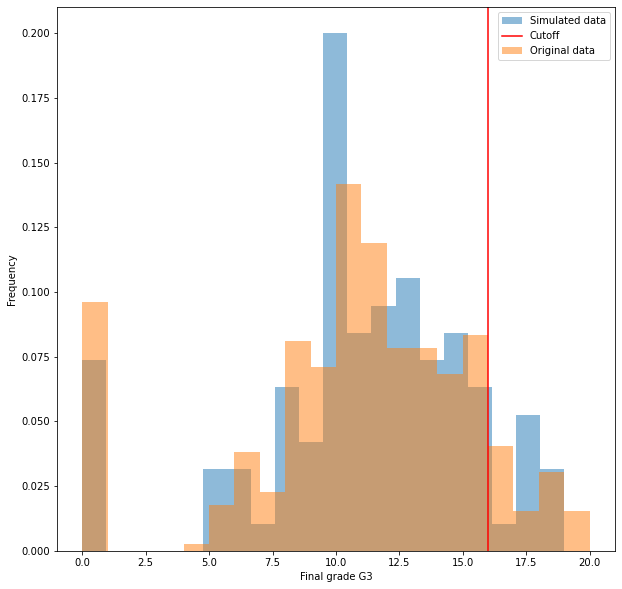

In [26]:
# Show the distribution of the simulated data and original data show them in the same plot
# Make the of simulation show the freuqnzy on the y-axis
plt.figure(figsize=(figsize,figsize))
plt.hist(G3_simulation.G3, bins=20, alpha=0.5, label="Simulated data", density=True)
plt.axvline(16, color="red", label="Cutoff")
plt.hist(student_data.G3, bins=20, alpha=0.5, label="Original data", density=True)
plt.legend()
plt.xlabel("Final grade G3")
plt.ylabel("Frequency")
plt.show()


# Betingad sannolikhet


Betingad sannolikhet handlar om att beräkna sannolikheten för en händelse givet att 
en annan händelse redan har inträffat. Med vårt studentdataset kan vi utforska 
betingade sannolikheter för olika händelser.

Låt oss titta på några exempel.


## Sannolikheten att en student får mer än 15 i betyg i slutbetyg (G3), givet att studenten kommer från skolan 'GP'

$$Pr(G3 > 15 | GP) = \frac{Pr(G3 > 15 \cap GP)}{Pr(GP)}$$

In [11]:
students_from_GP = student_data[student_data["school"] == "GP"]

# Students from school "GP" who scored more than 15 in G3
students_from_GP_high_score = students_from_GP[students_from_GP["G3"] > 15]

# Calculate the conditional probability
conditional_probability_score_GP = len(students_from_GP_high_score) / len(students_from_GP)
conditional_probability_score_GP
print(f"Probability of scoring more than 15 in G3 given that you are from school GP: {conditional_probability_score_GP:.4f}")


Probability of scoring more than 15 in G3 given that you are from school GP: 0.1060



Baserat på vårt dataset är den betingade sannolikheten att en student får mer än 15 i betyg 
i G3, givet att studenten kommer från skolan "GP", ungefär 10.60%. Detta ger oss en insikt 
i hur studenternas prestationer kan variera baserat på deras skolbakgrund.


## Sannolikheten att en student får mer än 15 i betyg i G3, givet en mycket hög nivå av alkoholkonsumtion under vardagar

In [12]:
students_high_dalc = student_data[student_data["Dalc"] >= 3]

# Students with high alcohol consumption on workdays who scored more than 15 in G3
students_high_dalc_high_score = students_high_dalc[students_high_dalc["G3"] > 15]

# Calculate the conditional probability
Pr_G3_above_15 = len(students_high_dalc_high_score) / len(student_data)
Pr_high_dalc_geq_3 = len(students_high_dalc) / len(student_data)

Pr_G3_above_15_given_high_dalc_geq_3 = Pr_G3_above_15 / Pr_high_dalc_geq_3

print(f"Pr(G3 > 15 | Dalc >= 3): {Pr_G3_above_15_given_high_dalc_geq_3:.4f}")


Pr(G3 > 15 | Dalc >= 3): 0.0682



Baserat på vårt dataset är den betingade sannolikheten att en student får mer än 15 i slutbetyg, givet en hög nivå av alkoholkonsumtion under vardagar $\text{Dalc} \geq 3 $

$$Pr(G3 > 15 | Dalc \geq 3) = \frac{Pr(G3 > 15) \cap Dalc \geq 3)}{Pr(Dalc \geq 3)} = 6.82\%$$

Alltså får bara 6.82% av studenterna som har en hög nivå av alkoholkonsumtion under vardagar mer än 15 i slutbetyg.

# Multiplikationssatsen


Multiplikationssatsen beskriver hur man kan beräkna sannolikheten för två (eller fler) 
händelser som inträffar samtidigt. 
$$
Pr(A \cap B) = Pr(A) \cdot Pr(B|A) = Pr(B) \cdot Pr(A|B)
$$

Med vårt studentdataset kan vi utforska denna sats 
genom att titta på sambandet mellan studenternas betyg och deras alkoholkonsumtion.
Låt oss beräkna sannolikheten för att en student både har ett betyg över 15 i G3 och har 
hög alkoholkonsumtion under arbetsdagar.


#### Sannolikheten att en student både har ett betyg över 15 i G3 och har hög alkoholkonsumtion under arbetsdagar

In [13]:
P_A_given_B = Pr_G3_above_15_given_high_dalc_geq_3
P_B = len(students_high_dalc) / len(student_data)

# Using the multiplication rule to calculate the probability
P_A_and_B = P_A_given_B * P_B
print(f"Pr(G3 > 15 och Dalc > 2) = {P_A_and_B:.4f}")


Pr(G3 > 15 och Dalc > 2) = 0.0076


Därmed ser vi att om vi tar i beaktan hela datasetet minskar sannolikheten för högt betyg och hög alkoholkonsumtion under arbetsdagar från 6.82% till 0.76%.

# Oberoende händelser med multiplikationssatsen


Två händelser, $ A $ och $ B $, sägs vara oberoende om inträffandet av $ A $ inte påverkar 
sannolikheten för $ B $, och vice versa. För oberoende händelser gäller:

$$
P(A 	\text{ och } B) = P(A) 	\times P(B)
$$

Med vårt studentdataset kan vi testa oberoendet av två händelser genom att jämföra 
$$ P(A 	\text{ och } B)  \text{ med }  P(A) 	\times P(B).$$

Låt oss titta på händelserna där en student är man och där en student vill gå på högskola.


### Beräkna individuella sannolikheter

In [14]:

# Probability of event A: student is male
P_A_male = len(student_data[student_data["sex"] == "M"]) / len(student_data)

# Probability of event B: student wants to go to higher education
P_B_higher = len(student_data[student_data["higher"] == "yes"]) / len(student_data)

P_A_male, P_B_higher


(0.47341772151898737, 0.9493670886075949)

### Testa oberoendet av händelserna
Vi låter:
- $A$ vara Män
- $B$ vara Vill gå på högskola

In [15]:

# Calculate joint probability and product of individual probabilities
P_A_and_B_joint = len(student_data[(student_data["sex"] == "M") & (student_data["higher"] == "yes")]) / len(student_data)
P_A_times_B = P_A_male * P_B_higher
P_A_and_B_joint, P_A_times_B


(0.43291139240506327, 0.4494472039737222)


Baserat på vårt dataset:

- $ Pr(A) $, sannolikheten att en student är man, är ungefär $41.92\%$.
- $ Pr(B) $, sannolikheten att en student vill gå på högskola, är ungefär $90.41\%$.
- $Pr(A 	\cap B)$, sannolikheten att en student är man och vill gå på högskola, är ungefär $43.29\%$.
- Produkten av $ Pr(A) $ och $Pr(B) $ är $41.92\% 	\times 90.41 = 44.94\%$.

Eftersom $ Pr(A 	\cap B) $ är nära produkten av  $Pr(A)$ och $Pr(B)$, kan vi anta att 
händelserna är ungefär oberoende i vårt dataset.
Alltså kan vi anta att händelserna är oberoende i vårt dataset.


#### Vi kan nu göra ett parvis test av oberoende för många par av händelser i vårt dataset.

{'age och Walc': 0.003339208460182666, 'age och Dalc': 0.011735298830315655, 'age och absences': 0.009831757731132831, 'age och G1': 0.009633071623137313, 'age och G3': 0.01902259253324788, 'Walc och Dalc': 0.061490145809966354, 'Walc och absences': 0.01647812850504727, 'Walc och G1': 0.026867489184425553, 'Walc och G3': 0.02122736740906906, 'Dalc och absences': 0.005037654222079795, 'Dalc och G1': 0.015587245633712544, 'Dalc och G3': 0.012991507771190517, 'absences och G1': 0.004697965069700362, 'absences och G3': 0.009248517865726648, 'G1 och G3': 0.10601506168883192}


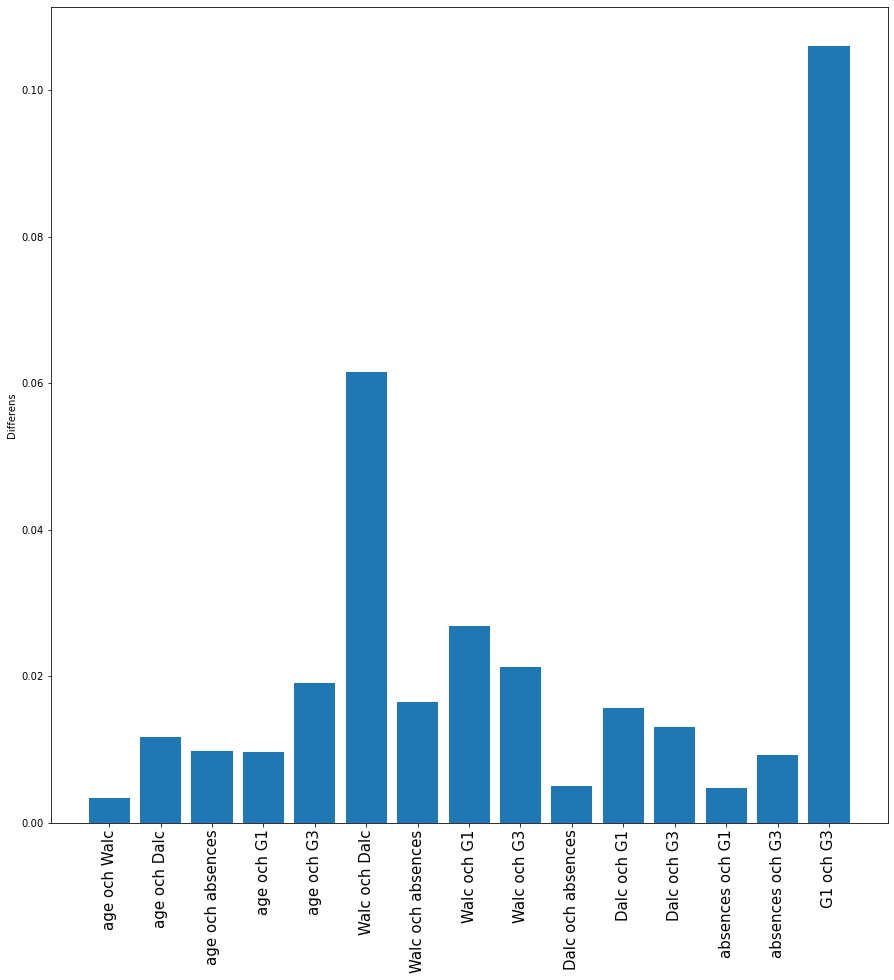

In [16]:
# Parvis oberoende

# Beräkna differensen mellan Pr(A och B) och Pr(A) * Pr(B) för 10 par av händelser i studentdatasetet
# Händelserna är:
list_events = {"age":18, "Walc":3, "Dalc":3, "absences":15, "G1":12, "G3":15}

# Lagra differenserna i en dict
differeces = {}

# Loopa över alla par av händelser
for column_A, event_A in list_events.items():
    for column_B, event_B in list_events.items():
        # Kolla om det är samma händelse
        if column_A == column_B:
            continue
        # Kolla om kombinationen redan finns i omvänd ordning
        if f"{column_B} och {column_A}" in differeces:
            continue
        # Beräkna sannolikheterna
        P_A_and_B_joint = len(student_data[(student_data[column_A] >= event_A) & (student_data[column_B] >= event_B)]) / len(student_data)
        P_A_times_B = (len(student_data[student_data[column_A] >= event_A]) / len(student_data)) * (len(student_data[student_data[column_B] >= event_B]) / len(student_data))
    
        # Lägg till differensen i dicten
        differeces[f"{column_A} och {column_B}"] = np.abs(P_A_and_B_joint - P_A_times_B)

print(differeces)

# Visualisera differenserna
plt.figure(figsize=(15,15))
plt.bar(range(len(differeces)), list(differeces.values()), align='center')
plt.xticks(range(len(differeces)), list(differeces.keys()), rotation=90, fontsize=15)
plt.ylabel("Differens")
plt.show()

# Bayes sats

Bayes sats är en matematisk formel som används för att uppdatera sannolikheten för en händelse givet ny information. Formeln är uppkallad efter den engelska matematikern Thomas Bayes och är en grundläggande princip inom sannolikhetsteori och statistik. 

Bayes sats säger att sannolikheten för en händelse A, givet en händelse B, kan beräknas genom att multiplicera sannolikheten för händelse B givet A med sannolikheten för händelse A och sedan dela med sannolikheten för händelse B. Matematiskt uttryckt ser formeln ut så här:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Där $P(A|B)$ är den betingade sannolikheten för händelse A givet händelse B, $P(B|A)$ är den betingade sannolikheten för händelse B givet händelse A, $P(A)$ är sannolikheten för händelse A och $P(B)$ är sannolikheten för händelse B. 

Då det ibland kan vara svårt att få fram data på $P(A|B)$ men lättare att få fram data på $P(B|A)$ kan Bayes sats användas för att beräkna $P(A|B)$ utifrån $P(B|A)$.


### Exempel på Bayes sats i praktiken
Vi är intresserade av sannolikheten att en student vill gå på högskolan, givet att studenter är kvinna. Vi låter:
- $A$ vara Vill gå på högskola
- $B$ vara Kvinna

Då blir Bayes sats:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Vi kan nu beräkna sannolikheten för $P(A|B)$ med hjälp av Bayes sats.

$$P(B|A) = \frac{P(A\cap B)}{P(A)} = \frac{\text{Andelen studenter som vill studera vidare \& är kvinnor}}{{\text{Andelen kvinnor}}}$$

In [17]:
# Beräkna sannolikheten för att en student vill gå på högskola, givet att studenten är kvinna
# Vi använder Bayes sats: P(higher | male) = P(male | higher) * P(higher) / P(male)

# P(male | higher): sannolikheten att en student är man, givet att studenten vill gå på högskola
P_female_given_higher = len(student_data[(student_data["sex"] == "F") & (student_data["higher"] == "yes")]) / len(student_data[student_data["higher"] == "yes"])
print(f"Sannolikheten för en Kvinna givet att man vill studera vidare:\nP(B|A) = {P_female_given_higher:.4f}")

Sannolikheten för en Kvinna givet att man vill studera vidare:
P(B|A) = 0.5440


In [18]:

# P(higher): sannolikheten att en student vill gå på högskola
P_higher = len(student_data[student_data["higher"] == "yes"]) / len(student_data)
print(f"P(A) = {P_higher:.4f}")

P(A) = 0.9494


In [19]:

# P(male): sannolikheten att en student är kvinna
P_female = len(student_data[student_data["sex"] == "F"]) / len(student_data)
print(F"P(B) = {P_female}")

P(B) = 0.5265822784810127


In [20]:

# Använd Bayes sats för att beräkna P(higher | female)
P_higher_given_female = P_female_given_higher * P_higher / P_female

print(f"Sannolikheten att en student vill gå på högskola, givet att studenten är kvinna:\nP(A|B) = {P_higher_given_female:.2f}")


Sannolikheten att en student vill gå på högskola, givet att studenten är kvinna:
P(A|B) = 0.98


Jämför nu med att beräkna direkt från data:
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

In [21]:
P_higher_given_female_direct = len(student_data[(student_data["sex"] == "F") & (student_data["higher"] == "yes")]) / len(student_data[student_data["sex"] == "F"])
print(f"P(Higher | Female) = {P_higher_given_female_direct:.2f}")

P(Higher | Female) = 0.98
